In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import pickle

from utils import *

In [2]:
with open("pickles/A_combined_model.pkl", 'rb') as f:
    model= pickle.load(f)

def check_image(image):
    img = np.array(image)
    if np.mean(img) < .05*256 or np.mean(img) > .95*256:
        return False
    return True

def get_orientation_map(voxel_list, pos_list, VOXEL_SIZE):
    angle_list = []
    x= pos_list[:, 0] + VOXEL_SIZE / 2
    y= pos_list[:, 1] + VOXEL_SIZE / 2
    u, v = [], []
    valid_count, invalid_count= 0, 0
    for voxel in voxel_list:
        
        if check_image(voxel):
            feature_vector= get_feature_vector(voxel, GRIDQ).reshape(1, -1)
            angle= model.predict(feature_vector)[0] * (np.pi/180)
            angle_list.append(angle)
            u.append(np.cos(angle))
            v.append(np.sin(angle))
            valid_count += 1
        else:
            angle_list.append(None)
            u.append(0)
            v.append(0)
            invalid_count += 1
    return x, y, u, v, angle_list, (valid_count, invalid_count)

def plot_map(image, img_name, x, y, u, v, counts, color="yellow", scale=1):
    plt.figure(figsize= (8, 8))
    plt.imshow(image, cmap= "gray")
    plt.quiver(x, y, u, v, color=color, pivot= "middle", scale=scale)
    
    plt.axis("off")
    plt.title(f"Img: {img_name} | Valid voxel rate: {counts[0]} / {counts[0]+counts[1]} ", fontsize= 7)

GRIDQ= np.arange(1, 6)
# GRIDQ= np.arange(1, 4)

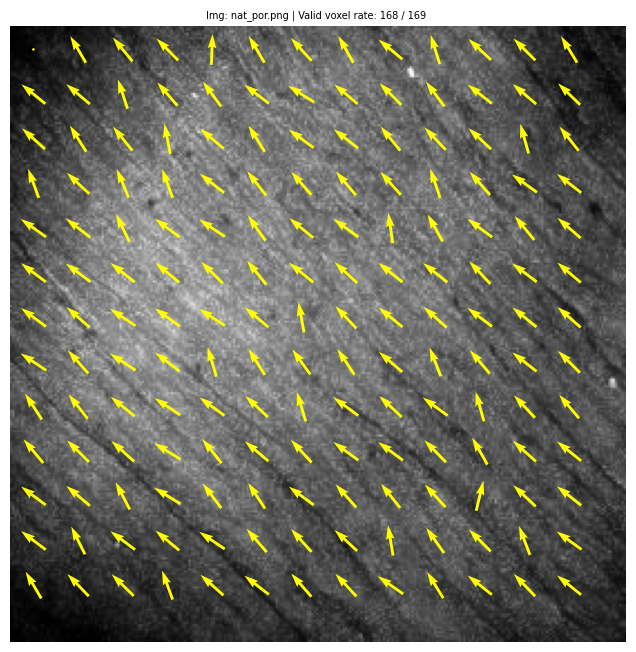

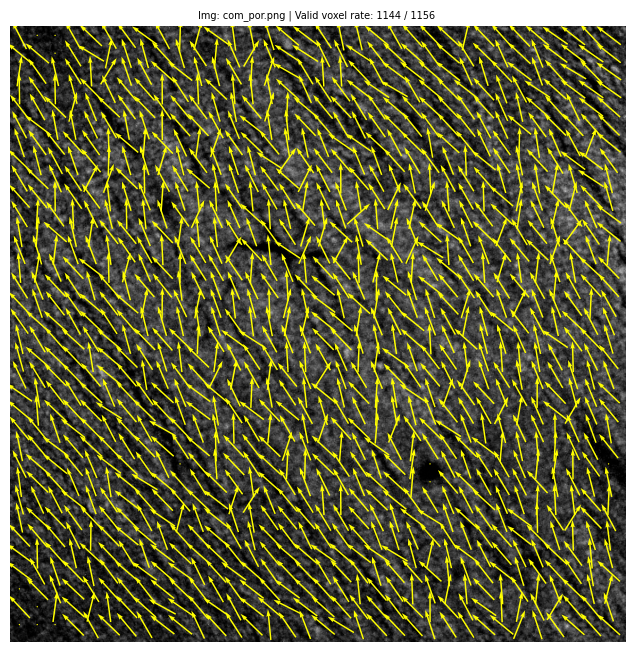

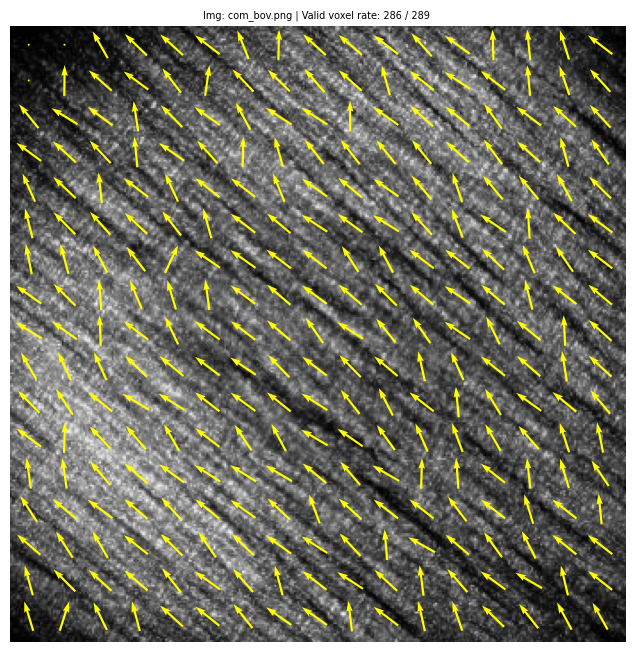

In [3]:
VOXEL_SIZE= 20

file_dir= "./images/eda_new/"
file_list= [file for file in os.listdir(file_dir) if file.endswith(".png")]
for img_name in file_list:
    img_dir= file_dir + img_name
    image = get_img(img_dir)
    voxel_list, pos_list = slice_image(image, VOXEL_SIZE)
    x, y, u, v, angle_list, counts = get_orientation_map(voxel_list, pos_list, VOXEL_SIZE)
    plot_map(image, img_name, x, y, u, v, counts, scale=20)
